In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_binary.csv")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
2,Adelie,Biscoe,44.907998,25.894140,204,3665,female
3,Adelie,Dream,26.304201,13.736113,160,8000,male
4,Adelie,Biscoe,54.870708,14.800691,210,5418,male


In [4]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Create new columns for encoded values
df['Species_n'] = LE.fit_transform(df['species'])

In [5]:
df.drop(axis=1,columns='species',inplace=True)

In [6]:
df_encoded = pd.get_dummies(df, columns=["island", "sex"], prefix=["island", "sexx"])

In [7]:
X = df_encoded.drop('Species_n', axis=1)
y =df_encoded['Species_n']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [9]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svclassifier.predict(X_test)

In [11]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[118  11]
 [  9 103]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       129
           1       0.90      0.92      0.91       112

    accuracy                           0.92       241
   macro avg       0.92      0.92      0.92       241
weighted avg       0.92      0.92      0.92       241



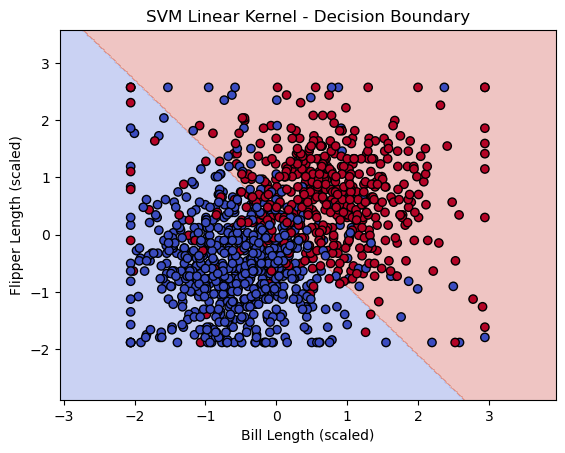

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Select 2 features for plotting (example: bill_length_mm and flipper_length_mm)
X_plot = df_encoded[["bill_length_mm", "flipper_length_mm"]].values
y_plot = df_encoded["Species_n"].values

# Scale features (important for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Train SVM again with only 2 features
clf = SVC(kernel="linear")
clf.fit(X_scaled, y_plot)

# Create meshgrid for background decision regions
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries + data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Flipper Length (scaled)")
plt.title("SVM Linear Kernel - Decision Boundary")
plt.show()


In [13]:
df_label=df

In [14]:
df_label['Island_n']  = LE.fit_transform(df_label['island'])
df_label['sex_n'] = LE.fit_transform(df_label['sex'])

In [15]:
df_label.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Species_n,Island_n,sex_n
0,Biscoe,51.211594,10.784101,198,6536,female,1,0,0
1,Biscoe,54.473814,16.435158,208,4077,female,1,0,0
2,Biscoe,44.907998,25.894140,204,3665,female,0,0,0
3,Dream,26.304201,13.736113,160,8000,male,0,1,1
4,Biscoe,54.870708,14.800691,210,5418,male,0,0,1


In [16]:
#df_label.drop(axis=1,columns='island',inplace=True)
df_label.drop(axis=1,columns='sex',inplace=True)

In [17]:
X =df_label.drop('Species_n', axis=1)
y =df_label['Species_n']

In [22]:
df_label.drop('island')

KeyError: "['island'] not found in axis"

In [ ]:
df_label.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=1)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select 2 features for plotting (example: bill_length_mm and flipper_length_mm)
X_plot = df_label[["bill_length_mm", "flipper_length_mm"]].values
y_plot = df_label["Species_n"].values

# Scale features (important for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Train SVM again with only 2 features
clf = SVC(kernel="linear")
clf.fit(X_scaled, y_plot)

# Create meshgrid for background decision regions
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries + data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Flipper Length (scaled)")
plt.title("SVM Linear Kernel - Decision Boundary")
plt.show()
